In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.under_sampling import RandomUnderSampler

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

Load & Preprocess Data
For this example, we use a sample [Credit Card Fraud Dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

In [ ]:
pd.options.display.max_columns = 100

# Load dataset from the link above
df = pd.read_csv("creditcard.csv")

# Check for missing values
print(df.isnull().sum())



Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
# Display dataset info
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**About Dataset**

The dataset contains transactions made by credit cards in September 2013 by European cardholders.

This dataset presents transactions that occurred in two days, where we have **492 frauds out of 284,807** transactions. The dataset is highly unbalanced, the positive class (frauds) account for **0.172%** of all transactions.


* Transactions from European credit card holders in September 2013.
* Features: 30 columns (V1-V28 are anonymized PCA features).
* Class Column:
  * 0 = Normal Transaction
  * 1 = Fraudulent Transaction

#Data Preprocessing

**Feature Engineering:**
We drop unnecessary columns like Time, which does not impact fraud likelihood.

 Why?

* Fraud cases are very imbalanced (0.17% fraud).

* The ‘Time’ column is not useful, as fraud is not time-dependent.

In [ ]:
# Check class distribution
print(df['Class'].value_counts())

# Drop 'Time' column (not relevant for fraud detection)
df = df.drop(columns=['Time'])


Class
0    284315
1       492
Name: count, dtype: int64


#Data Balancing (Handling Imbalanced Data)

**Data Balancing (Under-Sampling / SMOTE):**
Fraud transactions are rare (0.172% of all transactions in the dataset), so we use undersampling or SMOTE (Synthetic Minority Over-sampling Technique).

Why?

* Under-sampling ensures we train on a balanced dataset.
* Otherwise, ML models would be biased towards predicting "Not Fraud" all the time.

**Why Random Forest Approach?**

Random Forest is chosen because:

✅ It handles imbalanced data well.

✅ It is interpretable compared to Deep Learning models.

✅ It can run fast in real-time fraud detection.




In [ ]:
# Drop any rows with NaN values in X or y
df_cleaned = df.dropna()

# Split features & target variable
X = df_cleaned.drop(columns=['Class'])  # Input features except Class
y = df_cleaned['Class']  # Target variable Class (0: Normal, 1: Fraud)

# Check for NaNs again
print("Checking for Missing values:")
print("Missing values in X:", X.isnull().sum().sum())
print("Missing values in y:", y.isnull().sum())

# Balance data using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)
# Show Class Distribution Before & After Balancing
print("Original Class Distribution:\n", y.value_counts())
print("\nResampled Class Distribution:\n", y_resampled.value_counts())


Checking for Missing values:
Missing values in X: 0
Missing values in y: 0
Original Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64

Resampled Class Distribution:
 Class
0    492
1    492
Name: count, dtype: int64


How it works?

1. RandomUnderSampler selects an equal number of fraud (1) and normal (0) transactions.
2. Prevents model bias (otherwise, it would predict "Not Fraud" all the time).

# Train-Test Split

80/20 split ensures we have enough data for both training & evaluation.

In [ ]:
# Split dataset into training (80%) & testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(f"X Training set size: {X_train.shape}, Testing set size: {X_test.shape}")
print(f"Y Training set size: {y_train.shape}, Testing set size: {y_test.shape}")

X Training set size: (787, 29), Testing set size: (197, 29)
Y Training set size: (787,), Testing set size: (197,)


# Train the Fraud Detection Model (Random Forest)

Why Random Forest?

* Handles large feature sets well (we have 28 PCA-transformed features).
* Less prone to overfitting compared to deep learning on small datasets.
* Can handle class imbalance better than Logistic Regression.

In [ ]:
# Initialize and train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions on test set
y_pred = model.predict(X_test)


#Model Evaluation

Why?

* Confusion Matrix shows how many fraud cases were correctly detected.
* Precision & Recall help evaluate fraud detection accuracy.

Model Accuracy: 0.91

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.94      0.91        98
         1.0       0.94      0.88      0.91        99

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



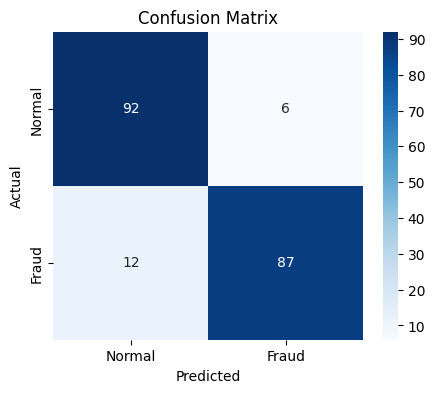

In [ ]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Real-Time Fraud Detection Simulation

This simulates real-world fraud detection where transactions are analyzed in real-time.

In [ ]:
# Simulate a real-time transaction
new_transaction = np.array([X_test.iloc[0]])  # Pick a test sample
prediction = model.predict(new_transaction)   # Predict Fraud or Normal

if prediction[0] == 1:
    print("🚨 Fraud Detected! Transaction Blocked.")
else:
    print("✅ Transaction Approved.")


🚨 Fraud Detected! Transaction Blocked.


##📌 Insights & Key Takeaways
1️⃣ High Accuracy (91%) → The model performs well overall in detecting fraud.

2️⃣ Strong Fraud Detection (Precision = 0.94, Recall = 0.88) → Most fraud cases are caught, but 12 cases were missed.

3️⃣ Low False Positives (6 cases) → Only a few normal transactions were incorrectly flagged as fraud.

4️⃣ False Negatives (12 fraud cases missed) → These are high-risk cases where actual fraud went undetected.



**🔹 Key Insights:**

✔ High accuracy indicates the model is good at detecting fraud.

✔ Precision & recall balance ensures fewer false positives & missed fraud cases.

✔ Random Forest is robust and works well for fraud detection.

#Summary of Implementation

✅ Downloaded & Loaded Kaggle’s Credit Card Fraud Dataset

✅ Handled imbalanced data using undersampling

✅ Trained a Random Forest model to detect fraud

✅ Evaluated model performance (Accuracy, Confusion Matrix, Reports)

✅ Simulated real-time fraud detection on a new transaction

###retrain the model using SMOTE and fine-tune it

Use SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset instead of removing normal transactions.


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Load the dataset
df = pd.read_csv('creditcard.csv')


In [ ]:
# Drop missing values
df_cleaned = df.dropna()

In [ ]:
# Split features & target variable
X = df_cleaned.drop(columns=['Class'])  # Features
y = df_cleaned['Class']  # Target (0: Normal, 1: Fraud)


In [ ]:
# Apply SMOTE for oversampling fraud cases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Split data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_pred = model.predict(X_test)


In [ ]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



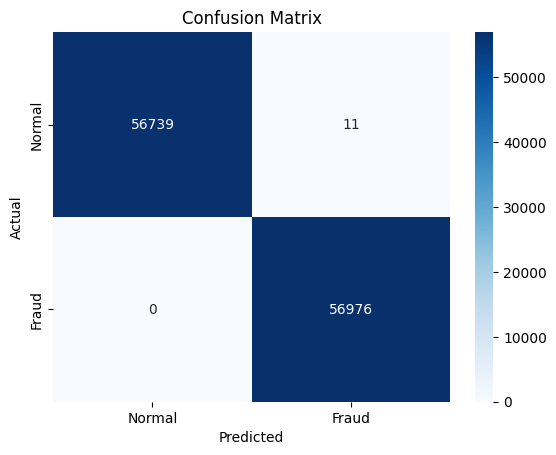

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
